### 1. Begin gathering the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r'C:\\Users\\Aryan Vyas\\Desktop\\Airline ticket prediction\\Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

It is better to terminate the missing values in this case

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 2. Data pre-processing and featurization

In [11]:
mydata = train_data.copy()

In [12]:
mydata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

for Date_of_Journey, convert the data type to datetime

In [13]:
def convert_to_datetime(col):
    mydata[col] = pd.to_datetime(mydata[col])

In [14]:
mydata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
datetime_list = ['Date_of_Journey','Dep_Time', 'Arrival_Time']
for features in datetime_list:
    convert_to_datetime(features)
mydata.dtypes

C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\4202943814.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mydata[col] = pd.to_datetime(mydata[col])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
mydata['journey_day'] = mydata['Date_of_Journey'].dt.day

In [17]:
mydata['journey_month'] = mydata['Date_of_Journey'].dt.month

In [18]:
mydata['journey_year'] = mydata['Date_of_Journey'].dt.year

In [19]:
mydata.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-30 05:50:00,2023-01-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-30 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [20]:
mydata.drop('Date_of_Journey',axis=1, inplace=True)

### 3. Data cleaning and featurization
for departure and arrival time.

In [21]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [22]:
extract_hour_min(mydata,'Arrival_Time')

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-30 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-30 05:50:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15


In [23]:
extract_hour_min(mydata,'Dep_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


In [24]:
def flight_dep_time(x):

    if ( x> 4) and (x<=8 ):
        return 'Early morning'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

In [25]:
mydata['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot: >

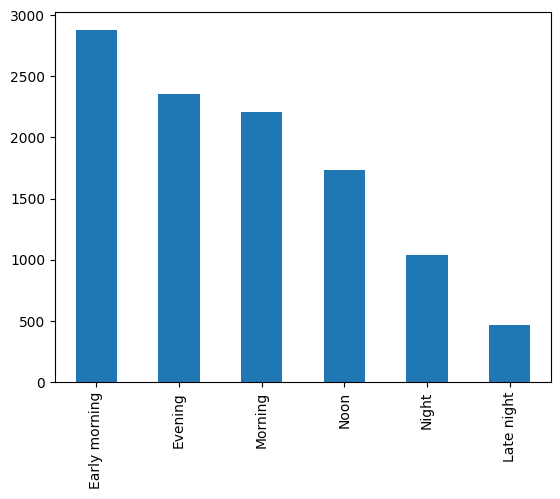

In [26]:
mydata['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [27]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [28]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [29]:
mydata['Duration'] = mydata['Duration'].apply(preprocess_duration)
mydata['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [30]:
int(mydata['Duration'][0].split(' ')[0][0:-1])


2

In [31]:
int(mydata['Duration'][0].split(' ')[1][0:-1])

50

This is done to remove all strings. Also separate Duration_hours and  Duration_mins.

In [32]:
mydata['Duration_hours']=mydata['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [33]:
mydata['Duration_mins']=mydata['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [34]:
mydata.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25


Total Duration vs Price

In [35]:
mydata['Duration_total_mins']=mydata['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [36]:
mydata.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25,325


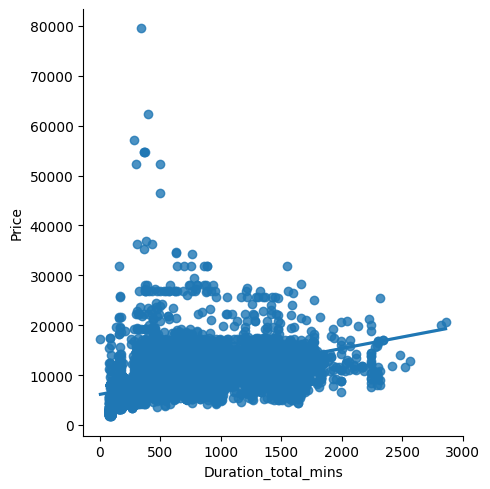

In [37]:
sns.lmplot(x='Duration_total_mins',y='Price',data=mydata)

An increase in total flight duration typically increases the price of the flight.

In [38]:
mydata['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot: ylabel='Destination'>

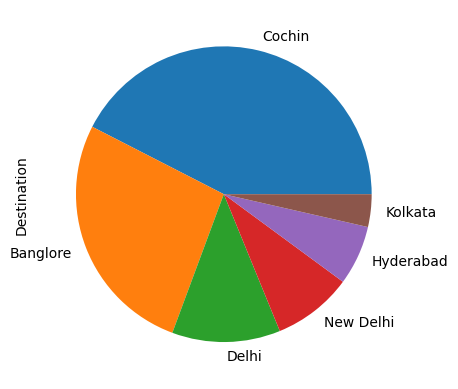

In [39]:
mydata['Destination'].value_counts().plot(kind='pie')

<AxesSubplot: ylabel='Source'>

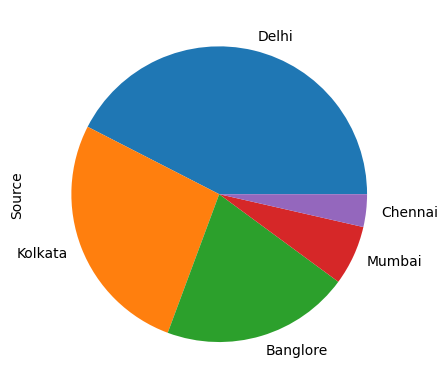

In [40]:
mydata['Source'].value_counts().plot(kind='pie')

In [41]:
mydata['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

### 4. Airline vs Price
* 5 point summary of the data -> Q1, Q2(median), Q3, max and min; i.e the boxplot
* We can observe some outliers.

In [42]:
mydata['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

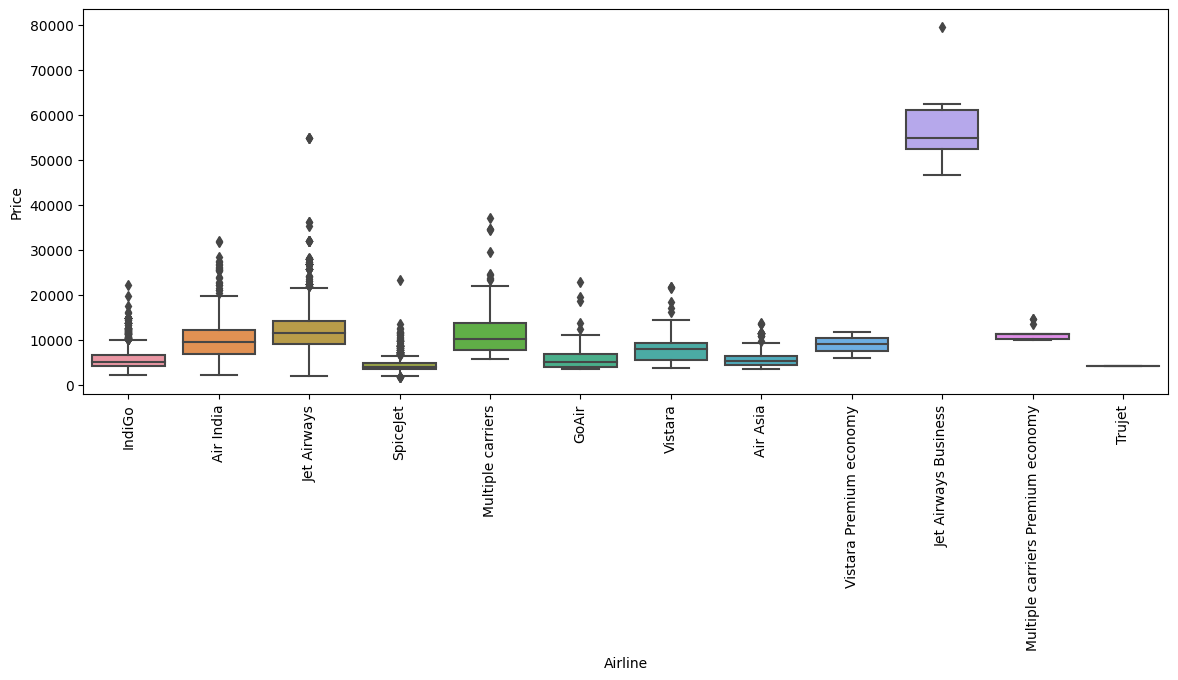

In [43]:
plt.figure(figsize=(14,5))
sns.boxplot(y='Price',x='Airline',data=mydata)
plt.xticks(rotation='vertical')

In [44]:
mydata['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [45]:
np.round(mydata['Additional_Info'].value_counts()/len(mydata)*100,2) #in percentage

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

Around 80% of this column contains no info.

In [46]:
mydata.head(3)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0,1140


In [47]:
mydata.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [48]:
mydata.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45


### 5. Categorial vs numeric data

In [49]:
cat_col=[col for col in mydata.columns if mydata[col].dtype=='object']
num_col=[col for col in mydata.columns if mydata[col].dtype!='object']

Convert Categorical data into numerical format <br>
for nominal data - OneHotEncoder <br>
ordinal data - LabelEncoder

In [50]:
# for source
mydata['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [51]:
mydata['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [52]:
for category in mydata['Source'].unique():
    mydata['Source_'+category] = mydata['Source'].apply(lambda x: 1 if x==category else 0)

In [53]:
mydata.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,1,0,0,0,0


Target guided mean encoding

In [54]:
airlines = mydata.groupby(['Airline'])['Price'].mean().sort_values().index
airlines
# price low to high

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [55]:
dict1={key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [56]:
# map it to the dictionary. Prices are in ascending order
mydata['Airline'] = mydata['Airline'].map(dict1)

In [57]:
mydata.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,0,0,1,0,0


In [58]:
mydata['Destination'].replace('New Delhi','Delhi',inplace=True)

In [59]:
# same steps for destination
dest=mydata.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [60]:
dict2={key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [61]:
mydata['Destination'] = mydata['Destination'].map(dict2)

In [62]:
mydata.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,0,0,1,0,0


Manual encoding to get numerical values of Total_stops

In [63]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [64]:
mydata['Total_Stops'] = mydata['Total_Stops'].map(stops)

In [65]:
mydata.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0


### 6. Outlier detection and analysis

In [66]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.distplot(df[col],ax=ax2,kde=False) # for histogram
    sns.boxplot(df[col],ax=ax3)
     

C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\1316773641.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\1316773641.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




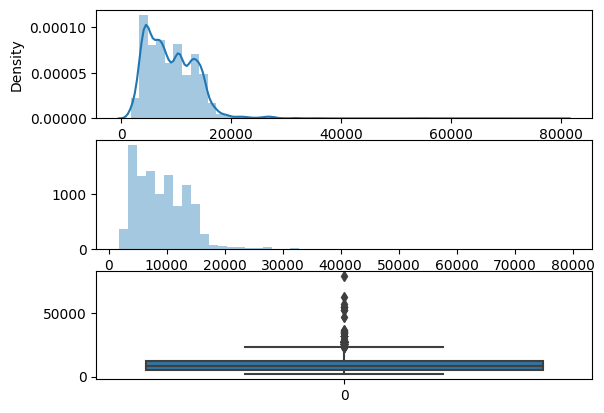

In [67]:
plot(mydata,'Price')

In [68]:
mydata['Price'] = np.where(mydata['Price']>=35000,mydata['Price'].median(),mydata['Price'])
# use median instead of mean

C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\1316773641.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\1316773641.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




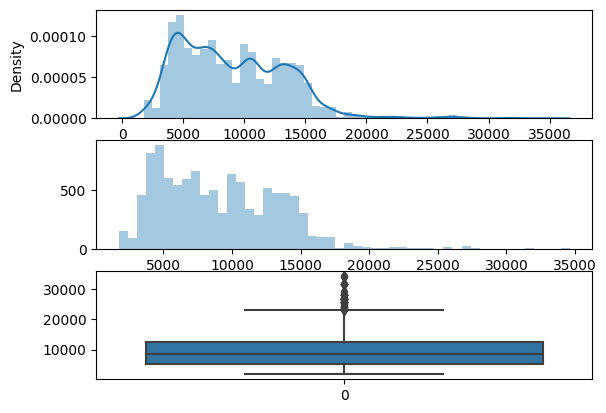

In [69]:
plot(mydata,'Price')

In [70]:
mydata.drop(columns=['Source','Duration'],axis=1,inplace=True)
mydata.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [71]:
mydata.head(3)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,4,25,9,25,19,0,0,0,1,0,0


### 7. Feature selection
find out the best features

In [72]:
#!pip install -U scikit-learn scipy matplotlib
from sklearn.feature_selection import mutual_info_regression

In [73]:
X = mydata.drop(['Price'],axis=1)
y = mydata['Price']

In [74]:
mutual_info_regression(X,y)

array([0.97953458, 1.00047842, 0.79160979, 0.18407962, 0.24206145,
       0.40415248, 0.34599846, 0.33350602, 0.25900563, 0.46204145,
       0.34054486, 0.39416517, 0.45560193, 0.51887436, 0.13643966,
       0.200613  ])

In [75]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Destination,0.996849
Airline,0.987965
Total_Stops,0.796843
Source_Delhi,0.527924
Duration_hours,0.459147
Source_Kolkata,0.450958
Arrival_Time_hour,0.405218
Source_Banglore,0.397487
Arrival_Time_minute,0.352093
Duration_mins,0.340405


We can see the importance of other features with respect to price

### 8. ML model

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestRegressor
ml_model=RandomForestRegressor()
model=ml_model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([16670.23,  6079.73,  8755.  , ...,  3549.87,  6361.16,  6870.21])

In [80]:
y_pred.shape

(2671,)

### 9. Save ML model

In [81]:
#!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [91]:
import pickle

In [102]:
file=open(r'C:\Users\Aryan Vyas\Desktop\Airline ticket prediction/rf_random.pkl','wb')

In [103]:
pickle.dump(model,file)
model=open(r'C:\Users\Aryan Vyas\Desktop\Airline ticket prediction/rf_random.pkl','rb')

In [104]:
forest = pickle.load(model)
forest.predict(X_test)

array([16670.23,  6079.73,  8755.  , ...,  3549.87,  6361.16,  6870.21])

### 10. Evaluation metrics

In [105]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [106]:
mape(y_test,forest.predict(X_test))

13.248699571403828

In [121]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [122]:
from sklearn import metrics

In [123]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [124]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

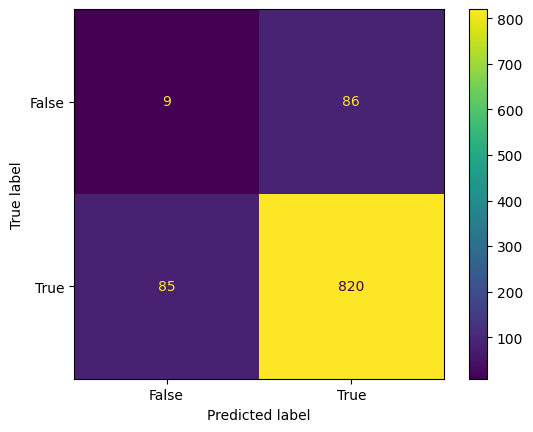

In [125]:
cm_display.plot()
plt.show()

### 11. Function to automate pipeline -

In [127]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9516818154127553
Predictions are : [16733.43  6250.68  8830.58 ...  3538.03  6477.05  7055.3 ]


r2_score: 0.8060016986407053
MSE :  3776681.2666362217
MAE :  1184.1601960913895
RMSE :  1943.3685359797873
MAPE :  13.266296648401275


C:\Users\Aryan Vyas\AppData\Local\Temp\ipykernel_24032\3399414806.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




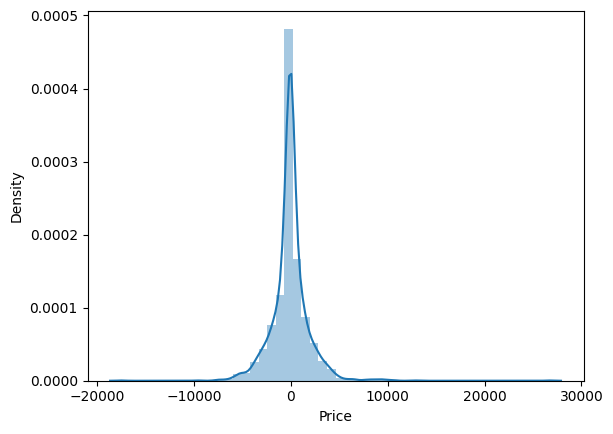

In [128]:
predict(RandomForestRegressor())